# Telecom Churn - Case Study

In [166]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [167]:
# Read data

df = pd.read_csv('telecom_churn_data.csv')
df.head()

df_original = df.copy()

# Data Analysis and Preparation

Lets Look at all columns and remove unrequired columns

In [168]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [169]:
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [170]:
# lets check nulls in total_rech_amt_6 and total_rech_amt_7

df.loc[:, ['total_rech_amt_6','total_rech_amt_7']].isna().sum()

total_rech_amt_6    0
total_rech_amt_7    0
dtype: int64

In [171]:
# Lets filter data based on requirement
# Those who have recharged with an amount more than or equal to X, 
# where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

df.loc[:, 'total_reach_amt_67'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)

In [172]:
df['total_reach_amt_67']

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: total_reach_amt_67, Length: 99999, dtype: float64

In [173]:
df['total_reach_amt_67'].describe(percentiles=[0.7])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: total_reach_amt_67, dtype: float64

In [174]:
# Filter DataFrame

df = df[df['total_reach_amt_67'] >= df['total_reach_amt_67'].quantile(0.7)]

In [175]:
# check nulls

round(df.isna().sum()/len(df)*100, 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
last_date_of_month_9         1.20
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
onnet_mou_9                  5.68
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
offnet_mou_9                 5.68
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_ic_mou_9                5.68
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
roam_og_mou_9                5.68
loc_og_t2t_mou

In [178]:
# lets check length of df

len(df)

30011

In [179]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30011.000000,30011.000000,30011.000000,30011.000000
mean,277.505207,562.667771,62.255936,271.587772
std,356.498986,654.205634,244.480322,895.999227
min,0.000000,0.000000,0.000000,0.000000
25%,63.620000,136.375000,0.000000,0.000000
50%,176.190000,383.090000,0.000000,0.000000
75%,360.695000,757.170000,6.350000,0.000000
max,7785.730000,11140.110000,8993.950000,39221.270000


In [180]:
# Lets assign churn

df.loc[:, 'churn'] = (df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0)

C:\Users\adi00\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\adi00\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [181]:
df.churn.value_counts()

False    27418
True      2593
Name: churn, dtype: int64

In [182]:
# Remove columns which are for last month

columns_to_remove = df.columns[df.columns.str.find('_9') != -1]

In [183]:
df = df.drop(columns_to_remove, axis = 1)

In [184]:
df.shape

(30011, 174)

In [185]:
round(df.isna().sum()/len(df)*100, 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
loc_og_t2t_mou_6             1.05
loc_og_t2t_mou_7             1.01
loc_og_t2t_mou_8             3.13
loc_og_t2m_mou_6             1.05
loc_og_t2m_mou_7             1.01
loc_og_t2m_mou_8             3.13
loc_og_t2f_mou

In [186]:
# check columns where are more than 50%. We can remove these columns 

columns_to_remove = df.loc[:, round(df.isna().sum()/len(df)*100, 2) > 50].columns
columns_to_remove

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'], dtype='object')

In [187]:
# dropping columns with more than 50% nulls

df = df.drop(columns_to_remove, axis=1)

In [188]:
df.shape

(30011, 144)

In [189]:
df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_reach_amt_67,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,True
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,False
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.

In [190]:
# we can remove some columns which are not useful

columns_to_remove = ['mobile_number','circle_id','last_date_of_month_6',
                     'last_date_of_month_7','last_date_of_month_8',
                     'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df = df.drop(columns_to_remove, axis=1)

In [191]:
# check nulls

round(df.isna().sum()/len(df)*100, 2)

loc_og_t2o_mou        0.38
std_og_t2o_mou        0.38
loc_ic_t2o_mou        0.38
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           1.05
onnet_mou_7           1.01
onnet_mou_8           3.13
offnet_mou_6          1.05
offnet_mou_7          1.01
offnet_mou_8          3.13
roam_ic_mou_6         1.05
roam_ic_mou_7         1.01
roam_ic_mou_8         3.13
roam_og_mou_6         1.05
roam_og_mou_7         1.01
roam_og_mou_8         3.13
loc_og_t2t_mou_6      1.05
loc_og_t2t_mou_7      1.01
loc_og_t2t_mou_8      3.13
loc_og_t2m_mou_6      1.05
loc_og_t2m_mou_7      1.01
loc_og_t2m_mou_8      3.13
loc_og_t2f_mou_6      1.05
loc_og_t2f_mou_7      1.01
loc_og_t2f_mou_8      3.13
loc_og_t2c_mou_6      1.05
loc_og_t2c_mou_7      1.01
loc_og_t2c_mou_8      3.13
loc_og_mou_6          1.05
loc_og_mou_7          1.01
loc_og_mou_8          3.13
std_og_t2t_mou_6      1.05
std_og_t2t_mou_7      1.01
std_og_t2t_mou_8      3.13
std_og_t2m_mou_6      1.05
s

In [105]:
# lets check what columns are null for t2o_mou

df[(df.loc_og_t2o_mou.isna()) | df.std_og_t2o_mou.isna() | df.loc_ic_t2o_mou.isna()]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_reach_amt_67,churn
2185,NaN,NaN,NaN,386.514,386.506,386.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,455,455,455,455,455,455,455,455,455,3.65,71.00,11.73,285.63,2316.13,1429.59,0,0,0,0,0,0,1,1,1,0,0,0,882,172.71,657.55,9.22,0.00,455.0,False
3506,NaN,NaN,NaN,996.558,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0,875,0,0,550,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2033,0.00,0.00,0.00,0.00,437.5,True
4190,NaN,NaN,NaN,2502.516,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,0,2555,0,0,655,0,0,550,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,266,0.00,0.00,303.54,0.00,1277.5,True
5220,NaN,NaN,NaN,427.619,213.786,213.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,

In [192]:
# lets check the columns

df[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,29897.0,29897.0,29897.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [193]:
# it looks like all values are null. So we can remove these columns

columns_to_remove = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
df = df.drop(columns_to_remove, axis=1)

In [194]:
# check nulls

round(df.isna().sum()/len(df)*100, 2)

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           1.05
onnet_mou_7           1.01
onnet_mou_8           3.13
offnet_mou_6          1.05
offnet_mou_7          1.01
offnet_mou_8          3.13
roam_ic_mou_6         1.05
roam_ic_mou_7         1.01
roam_ic_mou_8         3.13
roam_og_mou_6         1.05
roam_og_mou_7         1.01
roam_og_mou_8         3.13
loc_og_t2t_mou_6      1.05
loc_og_t2t_mou_7      1.01
loc_og_t2t_mou_8      3.13
loc_og_t2m_mou_6      1.05
loc_og_t2m_mou_7      1.01
loc_og_t2m_mou_8      3.13
loc_og_t2f_mou_6      1.05
loc_og_t2f_mou_7      1.01
loc_og_t2f_mou_8      3.13
loc_og_t2c_mou_6      1.05
loc_og_t2c_mou_7      1.01
loc_og_t2c_mou_8      3.13
loc_og_mou_6          1.05
loc_og_mou_7          1.01
loc_og_mou_8          3.13
std_og_t2t_mou_6      1.05
std_og_t2t_mou_7      1.01
std_og_t2t_mou_8      3.13
std_og_t2m_mou_6      1.05
std_og_t2m_mou_7      1.01
std_og_t2m_mou_8      3.13
std_og_t2f_mou_6      1.05
s

In [109]:
# lets check onnet_mou columns

df[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']].describe(percentiles=[.05,.1,.25,.5,.75,.90,.95,.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8
count,29695.000000,29708.000000,29073.000000
mean,299.184718,307.447285,276.234168
std,462.202367,483.244786,471.505518
min,0.000000,0.000000,0.000000
5%,3.740000,3.660000,0.880000
10%,11.998000,11.490000,6.460000
25%,42.960000,42.660000,32.210000
50%,128.330000,127.950000,106.280000
75%,357.120000,364.567500,309.980000
90%,799.548000,829.810000,744.754000


In [110]:
df[df.onnet_mou_6.isna() | df.onnet_mou_7.isna() | df.onnet_mou_8.isna()]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_reach_amt_67,churn
77,30.000,82.378,674.95,NaN,34.23,149.69,NaN,39.44,179.18,NaN,0.00,0.00,NaN,0.00,0.00,NaN,34.23,149.69,NaN,32.18,101.63,NaN,0.91,29.86,NaN,0.00,3.9,NaN,67.33,281.19,NaN,0.00,0.0,NaN,0.00,0.0,NaN,6.35,40.09,NaN,0.0,0.0,NaN,6.35,40.09,NaN,2.93,28.04,NaN,0.00,7.58,NaN,0.0,0.0,0.00,76.61,356.93,NaN,79.46,191.24,NaN,43.31,94.18,NaN,2.03,0.0,NaN,124.81,285.43,NaN,8.00,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,8.00,0.0,0.00,135.38,289.33,NaN,0.0,0.0,NaN,2.56,0.5,NaN,0.0,3.39,4,5,3,0,1154,750,0,1000,750,0,0,750,0.00,96.48,0.0,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.0,577.0,False
111,596.301,146.073,0.00,55.19,3.26,NaN,45.51,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.30,0.00,NaN,0.0,0.0,NaN,1.30,0.00,NaN,0.00,0.00,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.00,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.0,NaN,1.13,0.0,NaN,0.0,0.0,NaN,1.13,0.00,NaN,217.04,75.59,0.00,0.00,0.0,NaN,0.00,0.00,NaN,0.15,0.0,NaN,12,8,5,704,178,0,154,50,0,154,30,0,284.50,0.00,0.0,0.00,0.00,0.00,1,0,0,0,0,0,0,0,0,1,0,0,332,0.00,0.00,0.00,0.0,441.0,True
143,695.609,39.981,0.00,1325.91,28.61,NaN,13.91,1.89,NaN,0.00,8.94,NaN,0.00,8.53,NaN,18.89,6.83,NaN,8.58,1.56,NaN,0.00,0.00,NaN,2.09,0.00,NaN,27.48,8.39,NaN,1307.01,13.58,NaN,1.95,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,1308.96,13.58,NaN,0.00,0.00,NaN,3.38,0.00,NaN,1.20,0.0,NaN,1341.03,21.98,0.00,30.19,7.06,NaN,27.98,1.35,NaN,10.13,0.00,NaN,68.31,8.41,NaN,25.56,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,0.0,NaN,25.56,0.00,NaN,93.88,8.41,0.00,0.00,0.0,NaN,0.00,0.00,NaN,0.00,0.0,NaN,31,6,4,796,40,0,90,30,0,10,0,0,0.00,0.00,0.0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0,True
188,734.641,183.668,0.00,4.38,0.98,NaN,105.16,39.39,NaN,0.00,0.00,NaN,0.00,0.00,NaN,4.38,0.98,NaN,99.81,38.98,NaN,5.34,0.41,NaN,0.00,0.00,NaN,109.54,40.38,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,109.54,40.38,0.00,2

In [111]:
# lets check how many churners are there in this if last month's usage is null

df[df.onnet_mou_8.isna()].churn.value_counts()

True     736
False    202
Name: churn, dtype: int64

In [112]:
# lets check other column's null counts when onnet_mou_8 is null

df_nulls = df[df.onnet_mou_8.isna()]

In [113]:
round(df_nulls.isna().sum()/len(df_nulls)*100, 2)

arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6            15.67
onnet_mou_7            25.80
onnet_mou_8           100.00
offnet_mou_6           15.67
offnet_mou_7           25.80
offnet_mou_8          100.00
roam_ic_mou_6          15.67
roam_ic_mou_7          25.80
roam_ic_mou_8         100.00
roam_og_mou_6          15.67
roam_og_mou_7          25.80
roam_og_mou_8         100.00
loc_og_t2t_mou_6       15.67
loc_og_t2t_mou_7       25.80
loc_og_t2t_mou_8      100.00
loc_og_t2m_mou_6       15.67
loc_og_t2m_mou_7       25.80
loc_og_t2m_mou_8      100.00
loc_og_t2f_mou_6       15.67
loc_og_t2f_mou_7       25.80
loc_og_t2f_mou_8      100.00
loc_og_t2c_mou_6       15.67
loc_og_t2c_mou_7       25.80
loc_og_t2c_mou_8      100.00
loc_og_mou_6           15.67
loc_og_mou_7           25.80
loc_og_mou_8          100.00
std_og_t2t_mou_6       15.67
std_og_t2t_mou_7       25.80
std_og_t2t_mou_8      100.00
std_og_t2m_mou_6       15.67
std_og_t2m_mou

In [195]:
# lets check info

col_null_counts = df_nulls.isna().sum() > 0

In [196]:
# lets check info of all null columns

col_null_names = col_null_counts[col_null_counts].index

df[col_null_names].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 87 columns):
onnet_mou_6         29695 non-null float64
onnet_mou_7         29708 non-null float64
onnet_mou_8         29073 non-null float64
offnet_mou_6        29695 non-null float64
offnet_mou_7        29708 non-null float64
offnet_mou_8        29073 non-null float64
roam_ic_mou_6       29695 non-null float64
roam_ic_mou_7       29708 non-null float64
roam_ic_mou_8       29073 non-null float64
roam_og_mou_6       29695 non-null float64
roam_og_mou_7       29708 non-null float64
roam_og_mou_8       29073 non-null float64
loc_og_t2t_mou_6    29695 non-null float64
loc_og_t2t_mou_7    29708 non-null float64
loc_og_t2t_mou_8    29073 non-null float64
loc_og_t2m_mou_6    29695 non-null float64
loc_og_t2m_mou_7    29708 non-null float64
loc_og_t2m_mou_8    29073 non-null float64
loc_og_t2f_mou_6    29695 non-null float64
loc_og_t2f_mou_7    29708 non-null float64
loc_og_t2f_mou_8    29073 non-n

In [197]:
# we see huge number of churners in this group and since all are float columns, we can replace all with 0


df[col_null_names] = df[col_null_names].fillna(0)

In [198]:
# lets check nulls now

round(df.isna().sum()/len(df)*100,2)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [199]:
# lets analyze arpu columns (Average Revenue Per User)



In [200]:
df_arpu = df[df.churn][['arpu_6', 'arpu_7', 'arpu_8']]

df_arpu.describe()

,arpu_6,arpu_7,arpu_8
count,2593.000000,2593.000000,2593.000000
mean,678.716970,550.511946,243.063343
std,551.792864,517.241221,378.843531
min,-209.465000,-158.963000,-37.887000
25%,396.507000,289.641000,0.000000
50%,573.396000,464.674000,101.894000
75%,819.460000,691.588000,351.028000
max,11505.508000,13224.119000,5228.826000


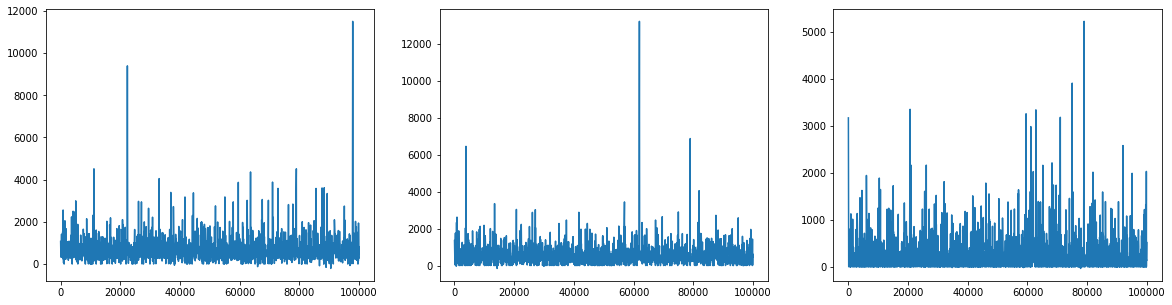

In [201]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(df[df.churn][['arpu_6']])
plt.subplot(1,3,2)
plt.plot(df[df.churn][['arpu_7']])
plt.subplot(1,3,3)
plt.plot(df[df.churn][['arpu_8']])

In [202]:
# Need better plot

# plt.figure(figsize=(20,5))

# ax = df_arpu.plot(y="arpu_6", kind="bar")
# df_arpu.plot(y="arpu_7", kind="bar", ax=ax, color="C2")
# df_arpu.plot(y="arpu_8", kind="bar", ax=ax, color="C3")

# plt.show()

In [203]:
df_arpu[['arpu_6','arpu_7']].mean(axis=1)

7        1209.5150
97        334.4430
111       371.1870
143       367.7950
188       459.1545
           ...    
99827     536.5475
99868     592.9550
99885     471.1630
99887     722.4335
99961     373.8945
Length: 2593, dtype: float64

In [204]:
# lets find mean of first two months and subtract third month's value
# Now, lets find if there are values equal to 0 or less than 0

((df_arpu['arpu_8'] - df_arpu[['arpu_6','arpu_7']].mean(axis=1)) <= 0).sum()

2269

In [205]:
# looking ab above value, it makes sense to create a new column with above values and delete arpu columns

df['chg_arpu'] = df['arpu_8'] - df[['arpu_6','arpu_7']].mean(axis=1)

In [206]:
# columns_to_remove = ['arpu_6', 'arpu_7', 'arpu_8']
# df = df.drop(columns_to_remove, axis=1)

In [207]:
df

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_reach_amt_67,churn,chg_arpu
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,True,1961.9650
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,False,-298.1100
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0,0,0,

In [208]:
# df['chg_onnet_mou'] = df['onnet_mou_8'] - df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)

In [209]:
# df['chg_offnet_mou'] = df['offnet_mou_8'] - df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
# df['chg_roam_ic_mou'] = df['roam_ic_mou_8'] - df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)

In [210]:
# df['chg_roam_og_mou'] = df['roam_og_mou_8'] - df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
# df['chg_loc_og_t2t_mou'] = df['loc_og_t2t_mou_8'] - df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)

In [211]:
def calculate_diff(col, dframe):
    diff = dframe[col + '_8'] - dframe[[col + '_6',col + '_7']].mean(axis=1)
    return diff

def delete_cols(col, dframe):
    return dframe.drop([col+'_6', col+'_7', col+'_8'], axis=1)

In [212]:
df['chg_roam_og_mou'] = calculate_diff('roam_og_mou', df)
df = delete_cols('roam_og_mou', df)

In [213]:
df['loc_og_t2t_mou'] = calculate_diff('loc_og_t2t_mou', df)


In [214]:
cols = df.columns

In [217]:
cols[cols.str.find('_7') > -1].str.replace('_6', '').str.replace('_7', '').str.replace('_8', '')

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2c_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_t2o_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g'], dtype='object')

In [218]:
sset = set(cols[(cols.str.find('_7') > -1)].str.replace('_6', '').str.replace('_7', '').str.replace('_8', ''))

In [219]:
len(sset)

41

In [220]:
for col in sset:
    df['chg_'+col] = calculate_diff(col, df)
    df = delete_cols(col, df)

In [221]:
df['chg_vbc_3g'] = df['aug_vbc_3g'] - df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)

In [222]:
df = df.drop(['aug_vbc_3g','jun_vbc_3g','jul_vbc_3g'], axis=1)

In [223]:
df

,aon,sep_vbc_3g,total_reach_amt_67,churn,chg_arpu,chg_roam_og_mou,loc_og_t2t_mou,chg_total_ic_mou,chg_monthly_2g,chg_std_ic_t2t_mou,chg_total_og_mou,chg_std_ic_t2o_mou,chg_loc_og_mou,chg_offnet_mou,chg_std_ic_t2m_mou,chg_og_others,chg_loc_og_t2f_mou,chg_std_og_t2f_mou,chg_std_og_t2c_mou,chg_max_rech_amt,chg_isd_og_mou,chg_monthly_3g,chg_total_rech_amt,chg_vol_3g_mb,chg_sachet_2g,chg_onnet_mou,chg_roam_ic_mou,chg_sachet_3g,chg_std_og_t2m_mou,chg_loc_og_t2t_mou,chg_std_og_t2t_mou,chg_std_og_mou,chg_loc_ic_t2f_mou,chg_ic_others,chg_total_rech_num,chg_isd_ic_mou,chg_spl_ic_mou,chg_spl_og_mou,chg_last_day_rch_amt,chg_std_ic_mou,chg_std_ic_t2f_mou,chg_loc_ic_mou,chg_vol_2g_mb,chg_loc_ic_t2t_mou,chg_loc_og_t2m_mou,chg_loc_ic_t2m_mou,chg_loc_og_t2c_mou,chg_vbc_3g
7,802,0.0,1185.0,True,1961.9650,19.895,-1.105,-163.510,0.0,6.030,-198.225,0.0,-222.245,-184.385,32.115,0.000,-5.405,3.31,0.0,395.0,9.92,0.0,2453.0,0.000,0.0,-3.970,6.780,0.0,8.315,-1.105,-1.785,9.840,-87.280,-0.325,2.0,23.295,-0.105,4.250,779.0,17.130,-21.005,-203.515,0.000,-17.890,-215.725,-98.335,0.000,38.680
8,315,0.0,519.0,False,-298.1100,0.000,-244.870,-49.635,-0.5,-0.190,-298.450,0.0,-270.095,48.835,-12.605,0.000,0.000,0.00,0.0,-92.0,0.00,0.0,-399.0,-363.535,2.5,-347.280,0.000,0.0,63.825,-244.870,-102.415,-38.590,0.000,0.000,-6.0,0.000,0.000,10.230,-15.0,-12.795,0.000,-36.840,-177.970,-16.530,-25.230,-20.300,7.150,-495.375
13,2607,0.0,380.0,False,244.0015,-20.180,8.100,573.935,0.0,77.595,465.510,0.0,224.595,216.165,148.950,0.000,21.240,0.00,0.0,20.0,1.29,0.0,337.0,0.000,3.0,229.165,-11.775,0.0,2.790,8.100,232.035,234.825,5.085,-28.420,6.0,239.695,-0.225,4.780,-80.0,228.460,1.910,134.415,0.020,14.850,195.255,114.475,0.490,0.000
16,511,0.0,459.0,False,-177.5280,-8.870,13.495,-78.750,0.0,-67.385,-83.030,0.0,-59.845,-100.255,28.050,0.000,8.020,0.00,0.0,20.0,0.00,0.0,-299.0,0.000,0.0,8.350,-1.415,0.0,-25.460,13.495,-2.005,-27.460,24.015,0.000,-6.0,0.230,0.000,4.280,30.0,-37.420,1.925,-41.565,0.000,-27.495,-81.360,-38.090,0.000,-12.170
17,667,0.0,408.0,False,-328.9950,9.110,-19.495,-47.095,0.0,-4.315,-625.170,0.0,-48.770,-25.280,-0.640,-0.465,0.000,0.00,0.0,-25.0,0.00,0.0,-378.0,0.000,0.0,-589.805,2.430,0.0,-0.775,-19.495,-573.860,-574.635,0.000,0.000,-6.5,0.000,0.000,-1.290,-15.0,-4.955,0.000,-42.135,0.000,-17.270,-29.270,-24.860,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,1022,0.0,392.0,False,-45.0905,-23.020,8.470,153.030,0.0,12.550,-13.350,0.0,49.370,-59.380,28.845,0.000,1.130,0.00,0.0,-11.5,0.00,0.0,-55.0,0.000,-3.0,23.810,-2.530,0.0,-94.620,8.470,15.340,-79.280,-0.410,1.260,-2.0,0.000,0.000,16.545,-10.0,41.390,0.000,110.380,0.000,9.580,39.770,101.210,17.350,0.000
99974,3054,0.0,465.0,False,3.3180,0.000,-5.055,-55.545,0.0,0.000,-46.830,0.0,-27.290,-37.015,1.545,-1.540,-1.295,-5.17,0.0,10.0,0.00,0.0,-77.0,0.000,0.0,-7.480,0.000,0.0,-13.645,-5.055,1.300,-17.520,-2.465,-0.805,-4.5,0.000,0.000,-0.475,10.0,-6.575,-8.120,-48.165,0.000,-6.175,-20.935,-39.530,-0.335,0.000
99986,2696,0.0,848.5,False,14.2335,0.000,115.885,58.505,0.0,-1.155,-11.990,0.0,43.605,-105.505,17.125,0.000,-4.870,0.00,0.0,-643.0,0.00,0.0,-823.5,-5.895,0.0,97.365,0.000,0.0,-29.895,115.885,-18.520,-48.410,3.285,0.000,-4.0,-0.215,0.000,-7.185,-668.0,15.050,-0.915,43.670,-18.875,25.835,-67.405,14.555,-7.185,-103.925
99988,328,0.0,467.0,False,-10.6650,0.000,-155.920,546.860,0.5,-9.615,-162.840,0.0,-171.205,21.885,-290.555,0.000,0.000,0.00,0.0,52.0,0.00,0.0,37.0,671.960,0.0,-184.715,0.000,0.0,37.155,-155.920,-28.795,8.355,-1.100,0.210,-3.0,0.000,0.000,0.010,0.0,-299.965,0.205,846.605,0.790,-24.230,-15.295,871.945,0.010,104.730


In [224]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

In [225]:
df = df.drop(['sep_vbc_3g','total_reach_amt_67'], axis=1)

In [226]:
y = df.pop('churn')
X = df

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [231]:
pca = PCA()

In [232]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [233]:
pca.components_

array([[ 2.50481863e-02,  2.96572781e-01, -4.12542242e-02, ...,
         1.62961561e-01,  3.88031404e-02,  3.52359230e-02],
       [ 2.32394679e-02,  1.66832976e-01,  1.17854303e-01, ...,
        -3.05153616e-01,  1.83216063e-02,  5.92363657e-02],
       [-8.61356472e-03, -4.70388819e-02,  1.12515087e-03, ...,
        -1.61652126e-01, -2.22357619e-02, -7.74800127e-02],
       ...,
       [ 0.00000000e+00,  6.51339377e-16, -5.63874057e-15, ...,
         7.38866858e-13, -9.23126166e-17, -3.95844203e-16],
       [ 0.00000000e+00,  7.48993670e-17,  7.17985015e-16, ...,
        -9.93479989e-14,  1.11781348e-16,  4.39418407e-17],
       [-0.00000000e+00, -4.93353802e-17,  1.24277046e-15, ...,
         8.83796387e-14,  1.29335309e-16,  8.60626117e-17]])

In [234]:
np.cumsum(pca.explained_variance_ratio_)

array([0.15492992, 0.22310242, 0.28263653, 0.33520354, 0.38081191,
       0.42078021, 0.45849734, 0.49332655, 0.52530349, 0.55551197,
       0.58543743, 0.61357404, 0.64022565, 0.66605744, 0.69026707,
       0.7139401 , 0.73734629, 0.76031132, 0.78301778, 0.80502867,
       0.82670888, 0.84788933, 0.86874185, 0.8872307 , 0.9053099 ,
       0.92158677, 0.93653181, 0.9509868 , 0.96282263, 0.97412455,
       0.98419091, 0.99113333, 0.99737253, 0.99979401, 0.99999401,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

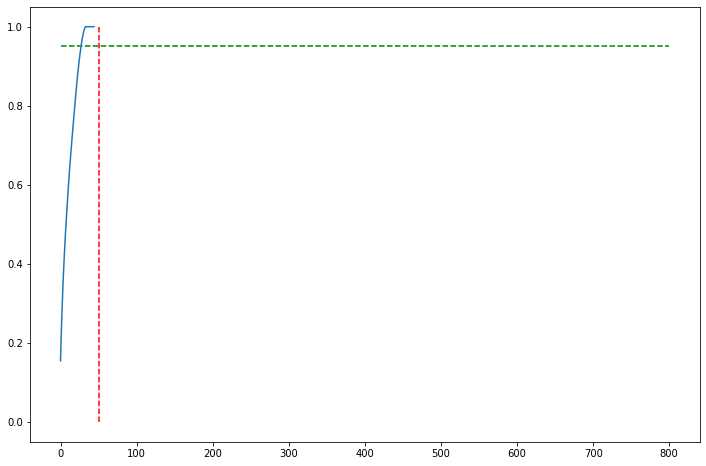

In [237]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=800, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [238]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=28)

In [239]:
X_train_pca = pca_final.fit_transform(X_train)

In [240]:
X_test_pca = pca_final.fit_transform(X_test)

In [248]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train_pca, y_train)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [249]:
y_pred_logreg = logreg.predict(X_test_pca)

In [250]:
accuracy_logreg = metrics.accuracy_score(y_test, y_pred_logreg)

In [251]:
accuracy_logreg

0.8076410484229232

In [252]:
recall_logreg = metrics.recall_score(y_test, y_pred_logreg)
print(recall_logreg)

0.6519480519480519


In [253]:
metrics.confusion_matrix(y_test, y_pred_logreg)

array([[6770, 1464],
       [ 268,  502]], dtype=int64)

In [254]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_pca, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [257]:
y_pred_bnb = bnb.predict(X_test_pca)
accuracy_bnb = metrics.accuracy_score(y_test, y_train_bnb)

print('BernoulliNB accuracy:', accuracy_bnb)

BernoulliNB accuracy: 0.9124833407374501


In [258]:
recall_bnb = metrics.recall_score(y_test, y_pred_bnb)
print(recall_bnb)

metrics.confusion_matrix(y_test, y_pred_bnb)

0.01038961038961039


array([[8208,   26],
       [ 762,    8]], dtype=int64)

In [159]:
# from sklearn.svm import SVC
# svc = SVC(kernel='linear')
# svc.fit(X_train_pca, y_train)

In [262]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [263]:
rfc.fit(X_train_pca,y_train)
y_pred_rfc = rfc.predict(X_test_pca)
accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc)

print('RFC accuracy:', accuracy_rfc)

C:\Users\adi00\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFC accuracy: 0.9137050199911151


In [264]:
recall_rfc = metrics.recall_score(y_test, y_pred_rfc)
print(recall_rfc)

metrics.confusion_matrix(y_test, y_pred_rfc)

0.012987012987012988


array([[8217,   17],
       [ 760,   10]], dtype=int64)

In [267]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train_pca, y_train)

y_pred_xgboost = xgboost_model.predict(X_test_pca)

accuracy_xgboost = metrics.accuracy_score(y_test, y_pred_xgboost)

print('XGB accuracy:', accuracy_xgboost)

XGB accuracy: 0.9149266992447801


In [268]:
(len(y_test) - y_test.sum())/len(y_test)

0.9144824522434474

In [269]:
recall_xgboost = metrics.recall_score(y_test, y_pred_bnb)
print(recall_xgboost)

metrics.confusion_matrix(y_test, y_pred_xgboost)

0.01038961038961039


array([[8181,   53],
       [ 713,   57]], dtype=int64)